In [1]:
########## Chicago Crime Analysis #################
# Import the packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


/Users/vishnu_mamidipudi/anaconda/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Load the data 
chicago_crime = pd.read_csv("/Users/vishnu_mamidipudi/Documents/Big_Data/DataCamp/Python/Chicago_Crime/Crimes_2017.csv")

In [3]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39065 entries, 0 to 39064
Data columns (total 22 columns):
ID                      39065 non-null int64
Case Number             39065 non-null object
Date                    39065 non-null object
Block                   39065 non-null object
IUCR                    39065 non-null object
Primary Type            39065 non-null object
Description             39065 non-null object
Location Description    38948 non-null object
Arrest                  39065 non-null bool
Domestic                39065 non-null bool
Beat                    39065 non-null int64
District                39065 non-null int64
Ward                    39065 non-null int64
Community Area          39065 non-null int64
FBI Code                39065 non-null object
X Coordinate            38292 non-null float64
Y Coordinate            38292 non-null float64
Year                    39065 non-null int64
Updated On              39065 non-null object
Latitude                3

In [4]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [5]:
# Remove the null values 
chicago_crime.dropna(inplace=True, axis=0)

In [6]:
# Change the format of the 'Primary Type' and 'Date' fields
chicago_crime['Primary Type'] = chicago_crime['Primary Type'].astype('category', ordered=False)
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date'].str[0:10], format='%m/%d/%Y')

### Question 1 - What are the top 12 most common crimes of the period?

In [7]:
gr_by_crime_type = chicago_crime[['Primary Type', 'Block']].groupby('Primary Type').agg('count')
gr_by_crime_type.reset_index(inplace=True)
gr_by_crime_type.columns = ["Crime Type", "Quantity"]
gr_by_crime_type.sort_values(by='Quantity', ascending=False, inplace=True)

In [8]:
top_12_crimes = gr_by_crime_type['Crime Type'][0:12]
top_12_crimes

28                  THEFT
2                 BATTERY
6         CRIMINAL DAMAGE
21          OTHER OFFENSE
1                 ASSAULT
8      DECEPTIVE PRACTICE
3                BURGLARY
15    MOTOR VEHICLE THEFT
25                ROBBERY
16              NARCOTICS
7       CRIMINAL TRESPASS
29      WEAPONS VIOLATION
Name: Crime Type, dtype: category
Categories (30, object): [ARSON, ASSAULT, BATTERY, BURGLARY, ..., SEX OFFENSE, STALKING, THEFT, WEAPONS VIOLATION]

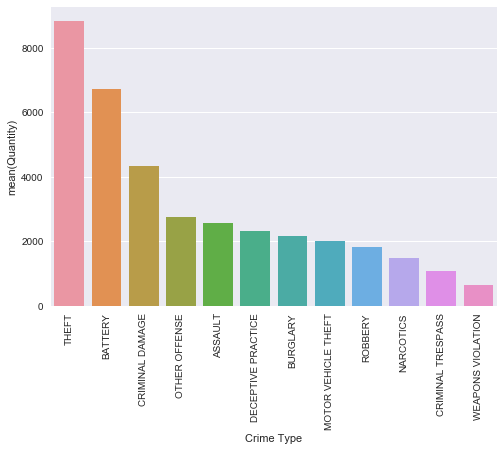

In [9]:
top_12_crimes_bar = gr_by_crime_type[0:12]
top_12_crimes_bar.head()
sns.barplot(data=top_12_crimes_bar, x='Crime Type', y='Quantity',order=top_12_crimes_bar['Crime Type'])
plt.xticks(rotation=90)
plt.show()

### Question 2 - What are the crime types that have median above 50 crimes/day?

In [10]:
grp_by_day = chicago_crime[['Primary Type','Date','Block']].groupby(['Primary Type','Date']).agg('count')
grp_by_day.reset_index(inplace=True)
grp_by_day.columns =['CrimeType', 'Date', 'Count']
grp_by_day.head()

,CrimeType,Date,Count
0,ARSON,2017-01-01,NaN
1,ARSON,2017-01-02,3.0
2,ARSON,2017-01-03,1.0
3,ARSON,2017-01-04,1.0
4,ARSON,2017-01-05,NaN


In [11]:
grp_by_day = grp_by_day[grp_by_day['CrimeType'].isin(np.asarray(top_12_crimes_bar['Crime Type']))]
grp_by_day['CrimeType'].unique()

[ASSAULT, BATTERY, BURGLARY, CRIMINAL DAMAGE, CRIMINAL TRESPASS, ..., NARCOTICS, OTHER OFFENSE, ROBBERY, THEFT, WEAPONS VIOLATION]
Length: 12
Categories (12, object): [ASSAULT, BATTERY, BURGLARY, CRIMINAL DAMAGE, ..., OTHER OFFENSE, ROBBERY, THEFT, WEAPONS VIOLATION]

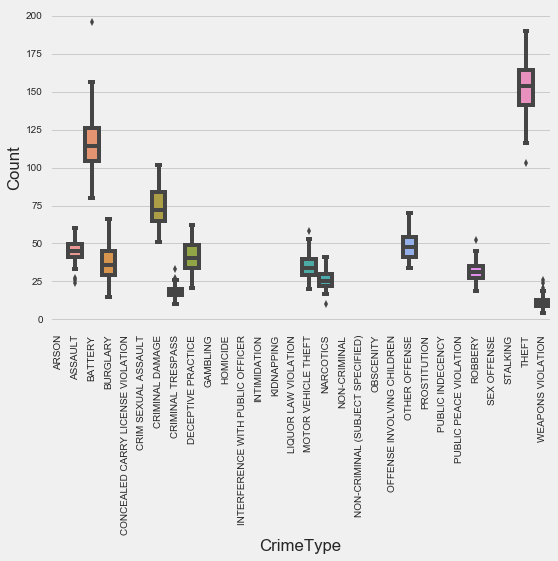

In [13]:
grp_by_day = grp_by_day[grp_by_day.CrimeType.isin(np.asarray(top_12_crimes))]
style.use('fivethirtyeight')
sns.boxplot(data=grp_by_day, x='CrimeType', y='Count')
plt.xticks(rotation=90)
plt.show()

The crimes that have a media of more than 50 times a day are "Theft", "Battery" and "Criminal Damage". 

### Question 3: For each crime type identified in the last question, use the latitude and longitude into a KDE plot, to analyse its spread.

In [14]:
theft = chicago_crime[['Latitude','Longitude']][chicago_crime['Primary Type']== 'THEFT']
battery = chicago_crime[['Latitude','Longitude']][chicago_crime['Primary Type']== 'BATTERY']
criminal_damage = chicago_crime[['Latitude','Longitude']][chicago_crime['Primary Type']== 'CRIMINAL DAMAGE']

In [15]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax = sns.kdeplot(theft.Latitude, theft.Longitude, cmap='Reds', shade=True, shade_lowest=False)

In [16]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax = sns.kdeplot(battery.Latitude, battery.Longitude, cmap='Blues', shade=True, shade_lowest=False)

In [17]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax = sns.kdeplot(criminal_damage.Latitude, criminal_damage.Longitude, cmap='Greens', shade=True, shade_lowest=False)

### Question 4: For each crime type plotted into KDE, discover the mean of the coordinates (latitude and longitude).

In [18]:
theft_lat_mean = theft.Latitude.mean()
theft_long_mean = theft.Longitude.mean()
battery_lat_mean = battery.Latitude.mean()
battery_long_mean = battery.Longitude.mean()
criminal_damage_lat_mean = criminal_damage.Latitude.mean()
criminal_damage_long_mean = criminal_damage.Longitude.mean()

In [19]:
print("Theft coordinates: ({:f},{:f})".format(theft_lat_mean, theft_long_mean))
print("Battery coordinates: ({:f},{:f})".format(battery_lat_mean, battery_long_mean))
print("Criminal damage coordinates: ({:f},{:f})".format(criminal_damage_lat_mean, criminal_damage_long_mean))

Theft coordinates: (41.862720,-87.667282)
Battery coordinates: (41.831977,-87.668571)
Criminal damage coordinates: (41.837694,-87.673674)
